In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('forestfires.csv')

In [3]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [4]:
df.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


# Exploratory Data Analysis

In [5]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [7]:
cor = df.corr()['area'].sort_values()

In [8]:
cor

RH     -0.075519
rain   -0.007366
ISI     0.008258
wind    0.012317
FFMC    0.040122
Y       0.044873
DC      0.049383
X       0.063385
DMC     0.072994
temp    0.097844
area    1.000000
Name: area, dtype: float64

Abbreviations

    FFMC : Fine Fuel Moisture Code
    DC   : Drought Code
    Dmc  : Duff Moisture Code
    ISI  : Initial Spread Index  


Fuel moisture is availability of fuel(water) in vegatation.Example if vegatation is tatally dry than fuel moisture = 0

# Properties

Higher the temperature (15-29 degrees) leads more forest fire so large hectre of land is burnt

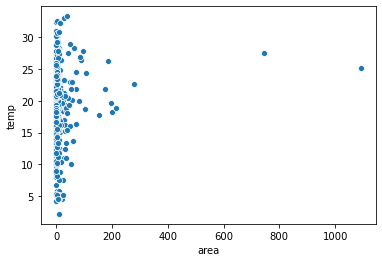

In [32]:
sns.scatterplot(data= df, x = 'area', y = 'temp')

# Season wise area burn

summer and autumn in portugal has highest tempereature that is june till october, where maximum forest fire occurs

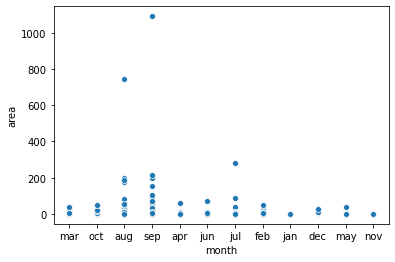

In [10]:
sns.scatterplot(data = df, x ='month', y = 'area')

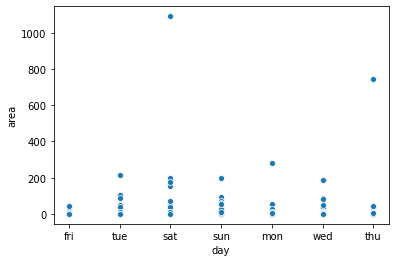

In [11]:
sns.scatterplot(data = df, x ='day', y = 'area')

its totally random to get insight that on what day forest fire will occur compare to months!

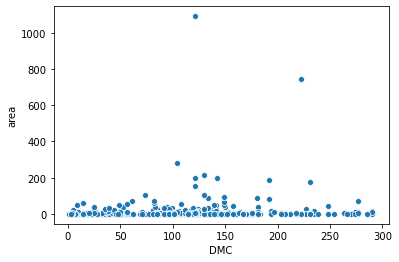

In [12]:
sns.scatterplot(data = df, x ='DMC', y = 'area')

DMC index indicates the organic fuel in soil.It predicts the probability of ignition to through lighting.So lets plot it 
against months

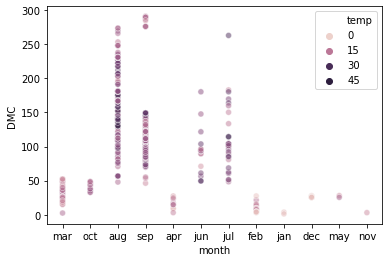

In [13]:
sns.scatterplot(data= df,x = 'month', y = 'DMC',hue = 'temp',alpha=0.5)

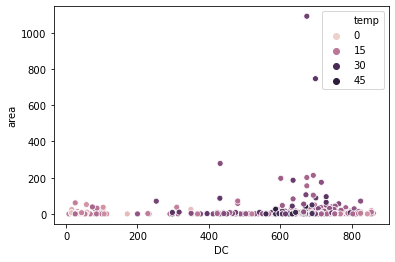

In [14]:
sns.scatterplot(data= df, x = 'DC', y = 'area',hue = 'temp')

# Geographical properties

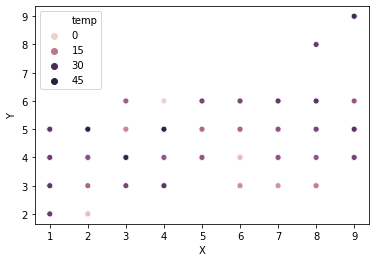

In [15]:
sns.scatterplot(data= df, x = 'X', y = 'Y',hue ="temp",sizes=(40, 200))

# Fire weather index system (FWIS)

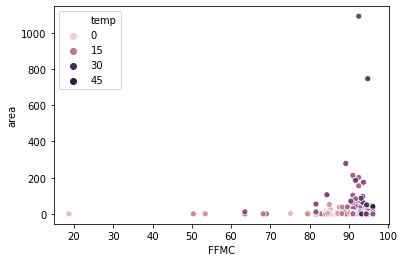

In [16]:
sns.scatterplot(data=df,x = 'FFMC', y ='area',hue = 'temp')

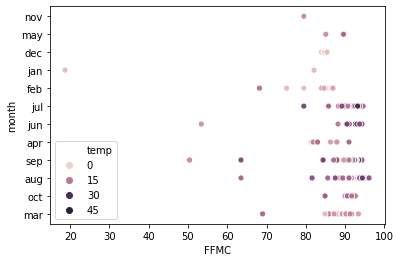

In [17]:
sns.scatterplot(data=df,x = 'FFMC', y ='month',hue = 'temp')

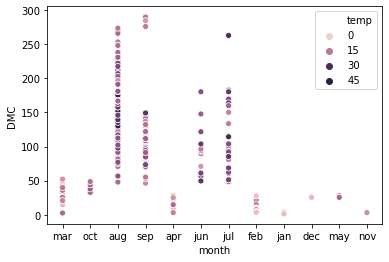

In [18]:
sns.scatterplot(data=df,x = 'month', y ='DMC',hue = 'temp')

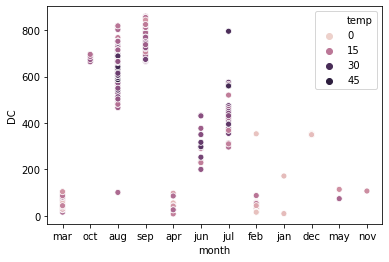

In [19]:
sns.scatterplot(data=df,x = 'month', y ='DC',hue = 'temp')

As seen in the graph value of DMC, FMCC, DC are maximum in months of summer where most forest fire occured.

# More features

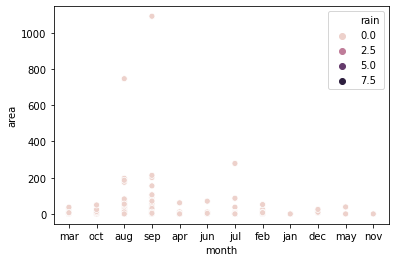

In [20]:
sns.scatterplot(data= df, x = "month", y = 'area',hue='rain')

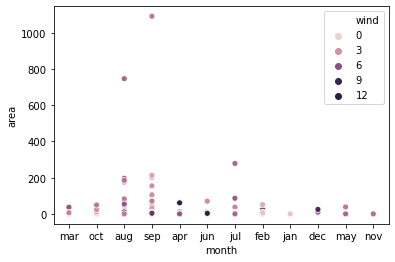

In [21]:
sns.scatterplot(data= df, x = "month", y = 'area',hue='wind')

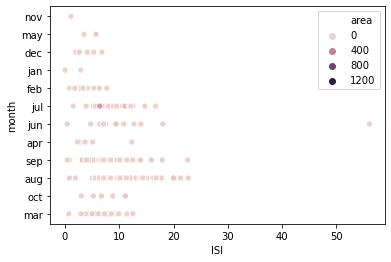

In [22]:
sns.scatterplot(data= df, x = "ISI", y = 'month',hue = "area")

#ISI stands of initial spread index

# Converting Categorical feature to numerical

In [23]:
#converting categorical into numerical
columns = ['month', 'day']

In [24]:
df = pd.get_dummies(data=df, columns=columns, drop_first=True)

In [25]:
X = df.drop('area', axis = 1).values
y = df['area'].values

# Splitting data 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scalar = StandardScaler()

In [30]:
X_train = scalar.fit_transform(X_train)

In [31]:
X_test = scalar.transform(X_test)